# Explore here

In [183]:
import pandas as pd
import requests
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sklearn.feature_selection import mutual_info_regression, SelectKBest

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [184]:
# Importamos datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


En el data set podemos observar un registro de 768 pacientes, 9 caracteristicas relevantes para la prediccion. Los datos estan en int64 y float64. 

Por otro lado, podemos ver que hay variables importantes, como *pregnancies*, *glucose*, *bloodpressure*, *bmi*.

-  Variable objetivo: *Outcome* donde 0: no tiene diabetes, 1: si tiene diabetes.

In [186]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Podemos ver que en el Dataset no hay valores nulos.

In [187]:
# Reemplazar datos 0 en las columns por la mean porque
#  luego no nos ayuda para nuestro analisis

columns = ["Glucose", "Pregnancies", "Insulin", "BloodPressure", "Age", "BMI", "DiabetesPedigreeFunction", "SkinThickness"]
for col in columns:
    df[col] = df[col].replace(0, df[col].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


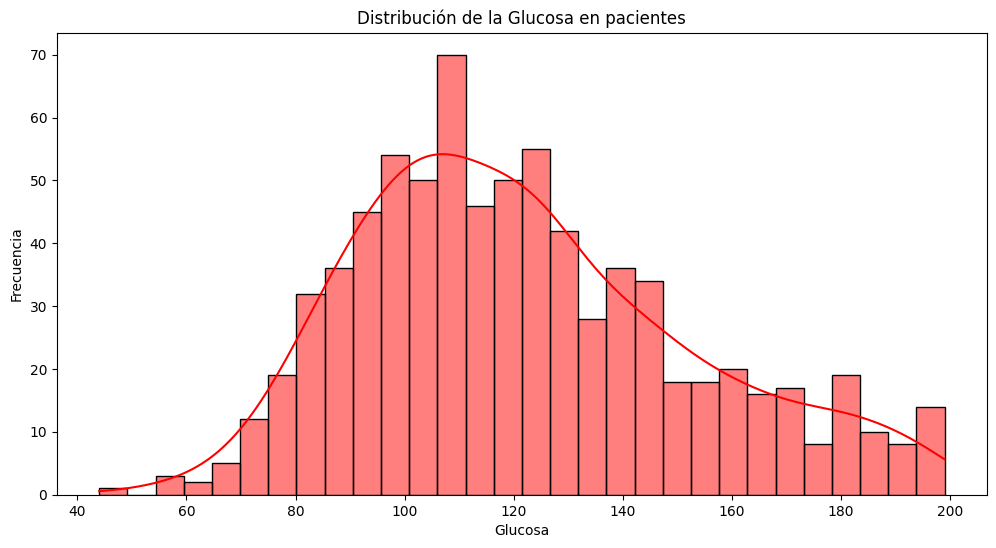

In [188]:
#Distribucion con la variable objetivo
plt.figure(figsize=(12, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='red')
plt.title('Distribución de la Glucosa en pacientes')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.show()

La mayoria de los valores se concentran en un rango de 80-140, indicando que algunos pacientes tienen niveles altos de glucosa es una señal de prevalencia de diabetes. 

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


El dataset tiene 768 registros y 9 columnas, todas las variables sin valores nulos. Todas las caracteristicas son numericas, entre ellas 7 variables float, 1 variable int64, y nuestra variable objetivo *Outcome* que es binaria, la distribucion esta desbalancead ya que hay 500 casos no diabeticos y 268 diabeticos. 

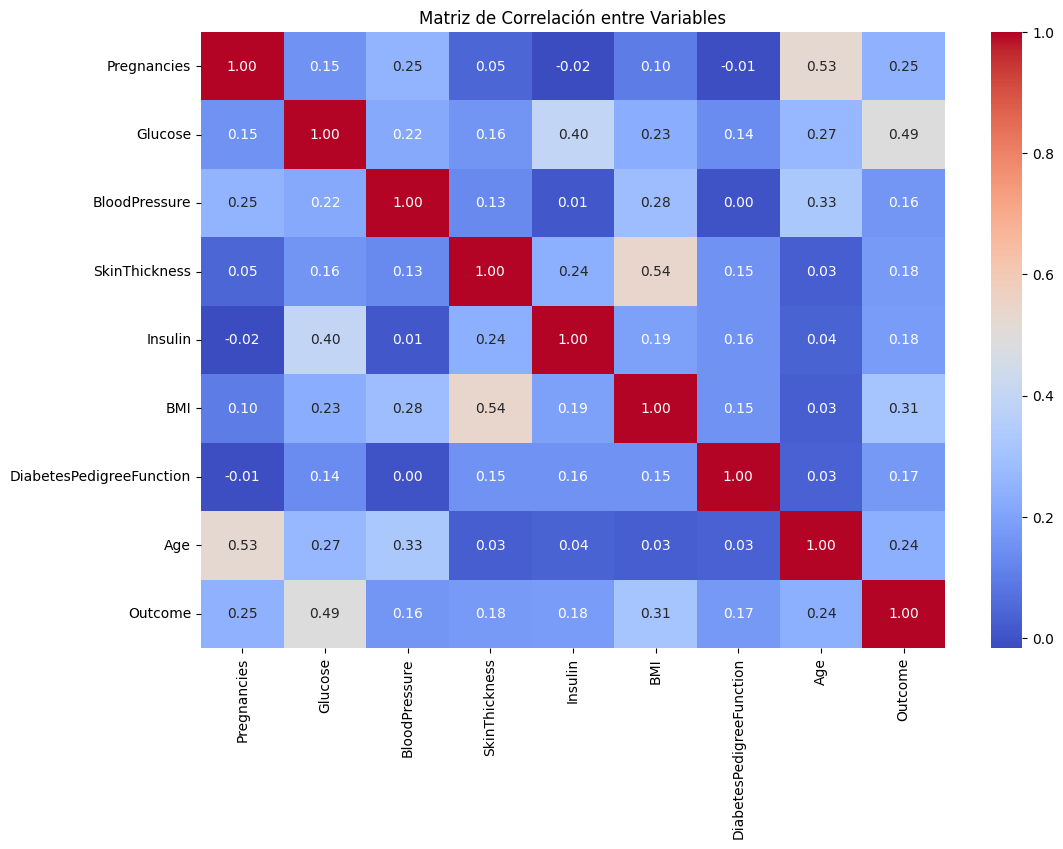

In [190]:
#Matriz de correlacion con todas las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

En nuestra matriz de correlacion podemos observar que *Glucose* tiene una correlación fuerte con *Outcome*, lo que indica que los niveles de glucosa son un buen predictor de diabetes.

*Age* y *Pregnancies* también tienen una correlación relativamente alta, lo cual es lógico ya que la cantidad de embarazos tiende a aumentar con la edad.

*BMI* muestra una correlación moderada con *SkinThickness*, es decir, que el grosor de la piel puede estar relacionado con el índice de masa corporal.

y por otro lado, que *Glucose*, *BMI* y *Age* tienen correlaciones más altas con Outcome, podrían ser variables clave para entrenar el modelo de predicción. Sin embargo, *insulin* y *BloodPressure* muentran correlacion bajas. 

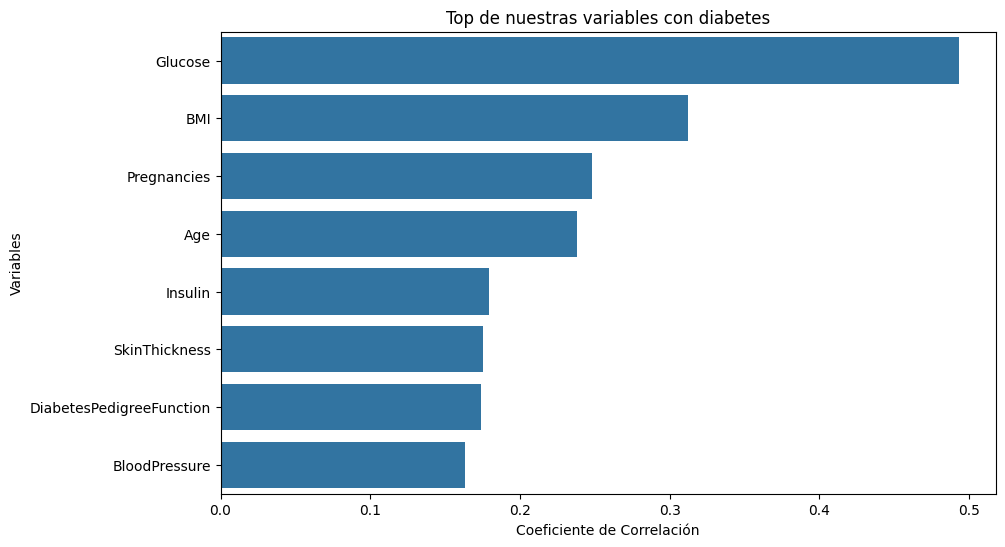

In [191]:
#Correlacion de nuestra variable objetivo con las demas. 

corr = df.corr(numeric_only=True)
corr_diabetes = corr["Outcome"].drop("Outcome").sort_values(ascending=False).head(8)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_diabetes.values, y=corr_diabetes.index, legend=False)
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.title("Top de nuestras variables con diabetes")
plt.show()

En este grafico podemos deducir que el diabetes es mayormente influenciado por la glucosa y por el indice de grasa, en pocas palabras, aquellas personas que consumen muchos azucares y grasa son mas propensos a contraer el diabetes. 

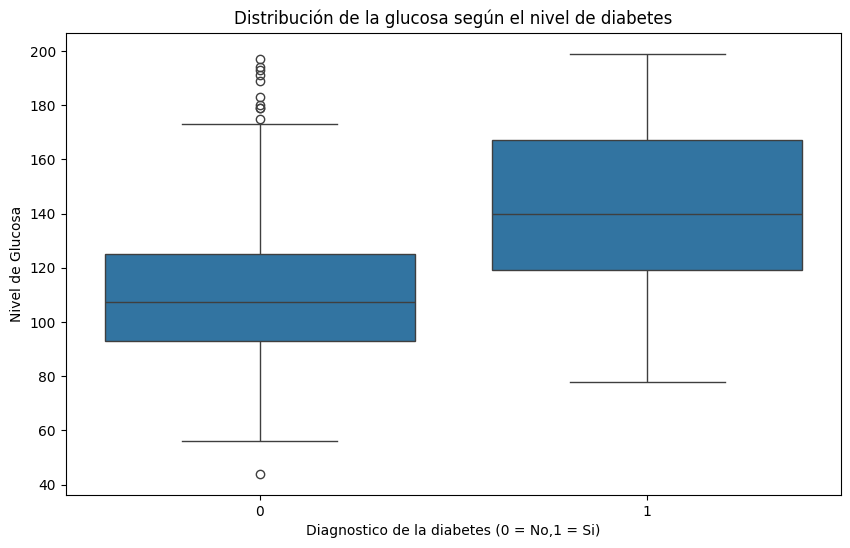

In [192]:
# Impacto de la glucosa con la diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Distribución de la glucosa según el nivel de diabetes")
plt.xlabel("Diagnostico de la diabetes (0 = No,1 = Si)")
plt.ylabel("Nivel de Glucosa")
plt.show()

El grafico nos muestra que hay mas pacientes con diabetes, y que hay algunos datos dentro de nuestro dataset dentro de acerca de los no, que pueden afectar a nuestro analisis y deducciones. 

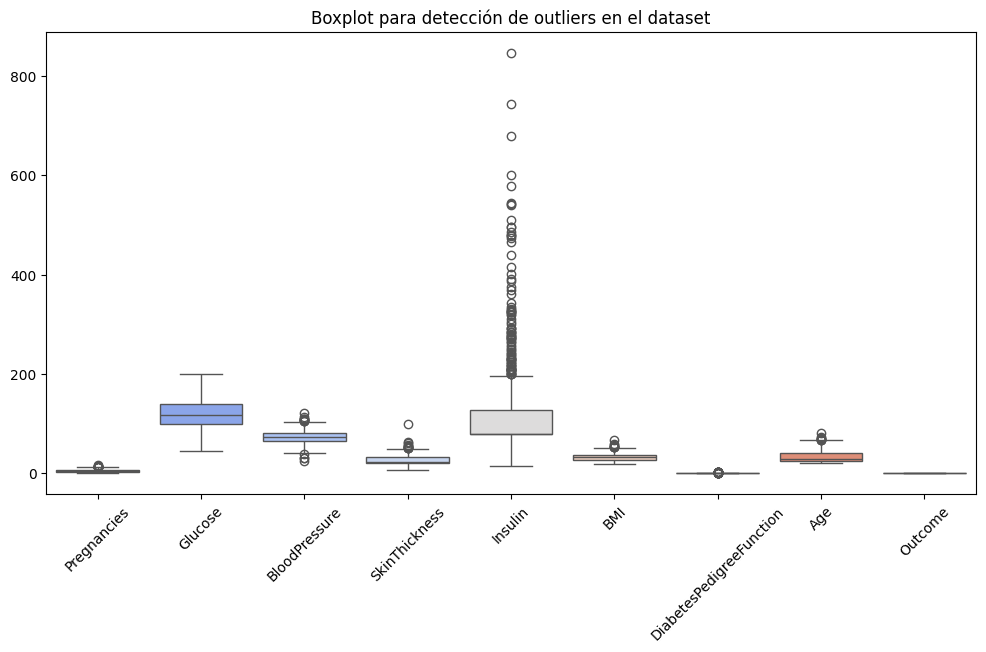

In [193]:
# Outliers dentro del dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.title("Boxplot para detección de outliers en el dataset")
plt.xticks(rotation=45)
plt.show()


In [194]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Filtrar valores extremos
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Cantidad de posibles outliers: {df_outliers.shape[0]}")


Cantidad de posibles outliers: 157


In [195]:

# Calcular IQR insulina
Q1 = df["Insulin"].quantile(0.25)
Q3 = df["Insulin"].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower:.2f}, Límite superior: {upper:.2f}")

Límite inferior: 8.62, Límite superior: 198.43


In [196]:
outliers_insulin = df[(df["Insulin"] < 8.62) | (df["Insulin"] > 198.43)]
print(f"Cantidad de valores atípicos en Insulin: {outliers_insulin.shape[0]}")

Cantidad de valores atípicos en Insulin: 89


In [197]:
# IQR EN Bloodpressure

Q1 = df["BloodPressure"].quantile(0.25)
Q3 = df["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bound:.2f}, Límite superior: {upper_bound:.2f}")


Límite inferior: 40.00, Límite superior: 104.00


In [198]:
# Identificar los valores fuera del rango IQR en BloodPressure
outliers_bp = df[(df["BloodPressure"] < 40.00) | (df["BloodPressure"] > 104.00)]
print(f"Cantidad de valores atípicos en BloodPressure: {outliers_bp.shape[0]}")


Cantidad de valores atípicos en BloodPressure: 14


In [199]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
lower_bM = Q1 - 1.5 * IQR
upper_bM = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bM:.2f}, Límite superior: {upper_bM:.2f}")

Límite inferior: 13.85, Límite superior: 50.25


In [200]:
# Identificar los valores fuera del rango IQR en BloodPressure
outliers_bM = df[(df["BMI"] < 13.85) | (df["BMI"] > 50.25)]
print(f"Cantidad de valores atípicos en BMI: {outliers_bM.shape[0]}")


Cantidad de valores atípicos en BMI: 8


In [201]:
# Eliminar valores en BloodPressure, Insulin Y BMI
# Calcular percentiles
low_st = df['BMI'].quantile(0.01)
high_st = df['BMI'].quantile(0.99)
df_cleaned = df[(df['BMI'] >= low_st) & (df['BMI'] <= high_st)]

low_bp = df['BloodPressure'].quantile(0.01)
high_bp = df['BloodPressure'].quantile(0.99)
df_cleaned = df[(df['BloodPressure'] >= low_bp) & (df['BloodPressure'] <= high_bp)]

#En el caso de insulin, tambien quito los valores en 0, 
# porque logico son erroneos

p5 = df_cleaned['Insulin'].quantile(0.05)
p95 = df_cleaned['Insulin'].quantile(0.95)
df_cleaned = df_cleaned[(df_cleaned['Insulin'] > 0) & (df_cleaned['Insulin'] >= p5) & (df_cleaned['Insulin'] <= p95)]


In [202]:
print(f"Registros originales: {df.shape[0]} vs Registros después de limpiar outliers: {df_cleaned.shape[0]}")

outliers_clean= df.shape[0] - df_cleaned.shape[0]
print(f"Cantidad de registros eliminados: {outliers_clean}")


Registros originales: 768 vs Registros después de limpiar outliers: 682
Cantidad de registros eliminados: 86


In [203]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               682 non-null    float64
 1   Glucose                   682 non-null    float64
 2   BloodPressure             682 non-null    float64
 3   SkinThickness             682 non-null    float64
 4   Insulin                   682 non-null    float64
 5   BMI                       682 non-null    float64
 6   DiabetesPedigreeFunction  682 non-null    float64
 7   Age                       682 non-null    int64  
 8   Outcome                   682 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 53.3 KB


Luego de la eliminacion de los outliers nuestro dataset ahora se ve asi:
-  682 registros y 9 columnas, donde 7 de ellas son float64 y 2 int64. 
- No hay valores nulos. 
Por ende nos ayudara ahora a obtener un mejor analisis. 

In [204]:

# Definir características (X) y variable objetivo (y)

X = df_cleaned.drop(columns=["Outcome"], axis=1)
y = df_cleaned["Outcome"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled_balance = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

Le hago un balanceo porque siento que los datos del nuestra variable objetivo van a afectar nuestro analisis dado que hay mas casos que no hay diabetes.

In [205]:
df_cleaned["Outcome"].value_counts()

Outcome
0    446
1    236
Name: count, dtype: int64

In [206]:
# Verificar nueva distribución
print(y_train_balanced.value_counts())


Outcome
0    356
1    356
Name: count, dtype: int64


In [207]:
#Modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled_balance, y_train_balanced)

#Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)

print("Precisión del modelo en test:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))




Precisión del modelo en test: 0.7445255474452555

Matriz de confusión:
[[70 20]
 [15 32]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        90
           1       0.62      0.68      0.65        47

    accuracy                           0.74       137
   macro avg       0.72      0.73      0.72       137
weighted avg       0.75      0.74      0.75       137



La precisión del modelo es de casi el 75%, lo que indica que clasifica correctamente la mayoría de los casos.
Reporte de clasificación:

Clase sin diabetes:

Precisión: De todas las veces que predijo 0, acertó el 82%.

Recall: De todas las veces que realmente era 0, el modelo lo predijo correctamente el 78% de las veces.

F1-score: Equilibrio entre precisión y recall.

Clase con diabetes:

Precisión: Más baja, indica que se confunde más al predecir 1.

Recall:De todos los verdaderos 1, detecta el 68%.

F1-score: Más bajo que el de la clase sin diabetes.

In [208]:
nuevo_paciente = [[2, 120, 70, 85, 20, 28.5, 0.5, 30]]

columns_df = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness',
              'BMI', 'DiabetesPedigreeFunction', 'Age']
nuevo_paciente_df = pd.DataFrame(nuevo_paciente, columns=X.columns)

nuevo_paciente_scaled = scaler.transform(nuevo_paciente_df)

# Predecir diagnóstico
prediccion = model.predict(nuevo_paciente_scaled)

# Resultado
resultado = "Tiene diabetes" if prediccion[0] == 1 else "No tiene diabetes"
print(f"Resultado del paciente: {resultado}")


Resultado del paciente: No tiene diabetes


In [209]:
# Árbol GINI
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train_scaled_balance, y_train_balanced)

# Árbol ENTROPY
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train_scaled_balance, y_train_balanced)

# Predicciones
y_pred_gini = tree_gini.predict(X_test_scaled)
y_pred_entropy = tree_entropy.predict(X_test_scaled)

# Evaluación de precisión
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Precisión con GINI: {acc_gini:.3f}")
print(f"Precisión con ENTROPY: {acc_entropy:.3f}")


Precisión con GINI: 0.745
Precisión con ENTROPY: 0.730


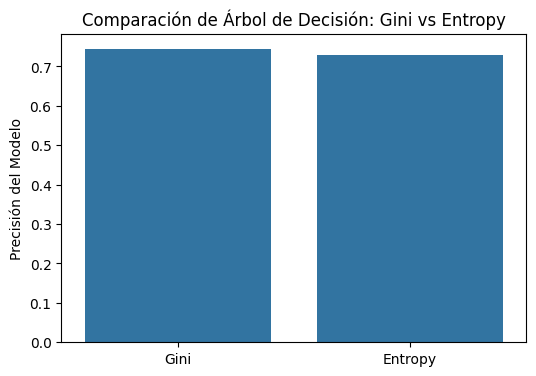

In [210]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Gini", "Entropy"], y=[acc_gini, acc_entropy])
plt.ylabel("Precisión del Modelo")
plt.title("Comparación de Árbol de Decisión: Gini vs Entropy")
plt.show()


Fitting 5 folds for each of 2688 candidates, totalling 13440 fits


Mejores hiperparámetros encontrados:
{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

Matriz de confusión:

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        90
           1       0.64      0.79      0.70        47

    accuracy                           0.77       137
   macro avg       0.76      0.78      0.76       137
weighted avg       0.79      0.77      0.78       137


Precisión final en Test: 0.7737226277372263


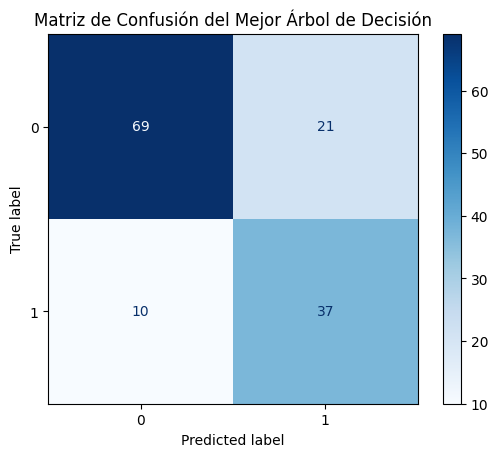

In [211]:
tree = DecisionTreeClassifier(random_state=42 , class_weight="balanced")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]
}

# GridSearch
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Entrenar
grid_search.fit(X_train_scaled_balance, y_train_balanced)

# Mejor combinación de parámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test_scaled)

print("\nMatriz de confusión:")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nPrecisión final en Test:", accuracy_score(y_test, y_pred))
plt.title("Matriz de Confusión del Mejor Árbol de Decisión")
plt.show()

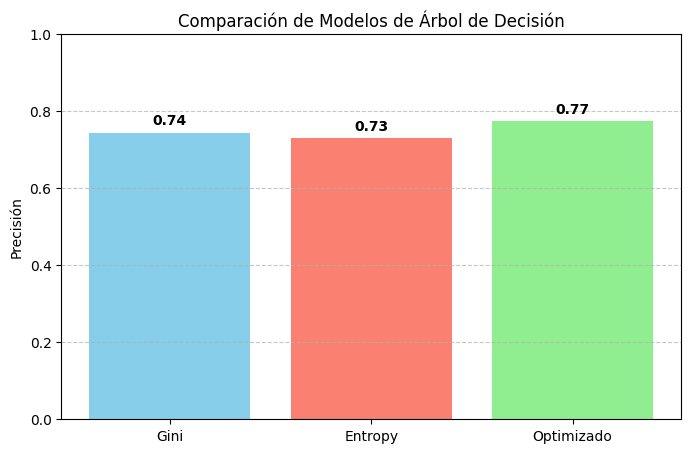

In [212]:
# Precisión de cada modelo
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
acc_best = accuracy_score(y_test, y_pred)

# Datos para el gráfico
model_names = ['Gini', 'Entropy', 'Optimizado']
accuracies = [acc_gini, acc_entropy, acc_best]

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Precisión')
plt.title('Comparación de Modelos de Árbol de Decisión')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Entropy: Precisión de 73%, menor precisión de todos los modelos.

Gini: Precisión de 74%, mejoró ligeramente respecto a Entropy, se debe a que Gini tiende a buscar información más clara.

Optimizado: Precisión de 77%, es el más alto de los tres modelos. Esto indica que aunque el criterio GirdSearch es rápido y eficiente.

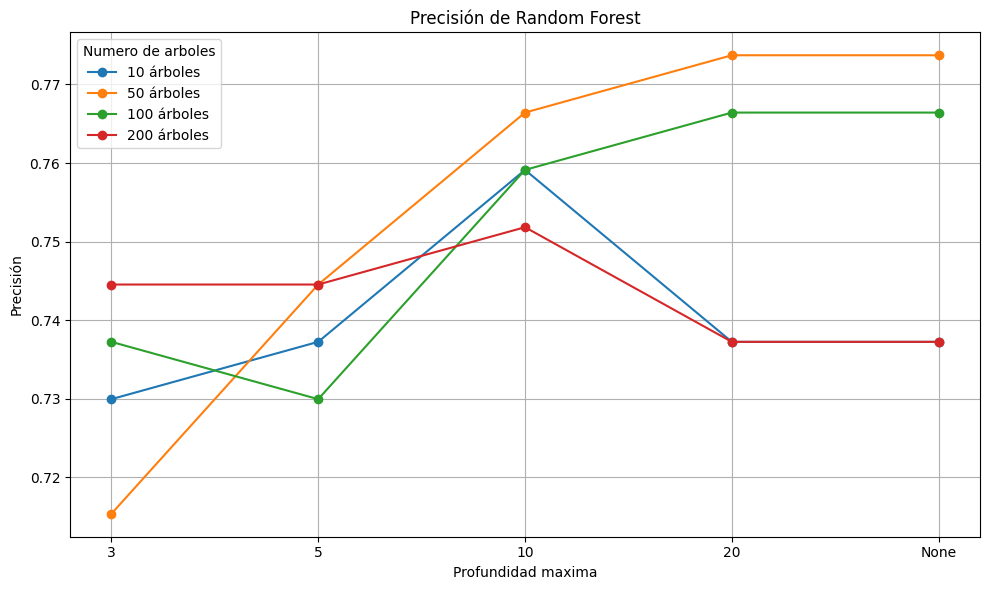

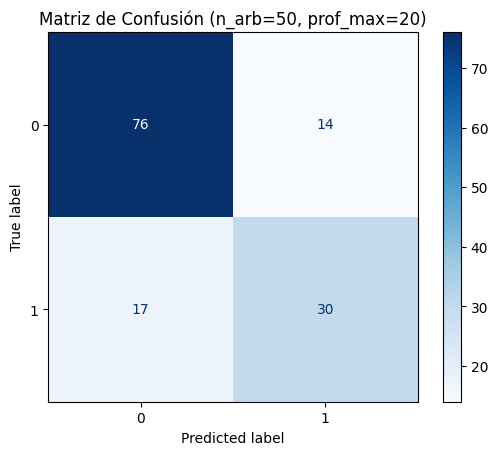

Mejor modelo -> n_estimators: 50, max_depth: 20, Precisión: 0.774


In [213]:
#Precision con RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

n_arb = [10, 50, 100, 200]
prof_max = [3, 5, 10, 20, None]
results = np.zeros((len(n_arb), len(prof_max)))

for i, n in enumerate(n_arb):
    for j, d in enumerate(prof_max):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train_scaled_balance, y_train_balanced)
        y_pred = rf.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results[i, j] = acc

column_names = [str(d) for d in prof_max]
index_names = [f"{n}_trees" for n in n_arb]
df_results = pd.DataFrame(results, columns=column_names, index=index_names)

df_results.to_csv("resultados_random_forest.csv")

# Gráfica
plt.figure(figsize=(10, 6))
for i, n in enumerate(n_arb):
    plt.plot(column_names, results[i], marker='o', label=f'{n} árboles')
plt.title('Precisión de Random Forest')
plt.xlabel('Profundidad maxima')
plt.ylabel('Precisión')
plt.legend(title='Numero de arboles')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mejor combinación
best_idx = np.unravel_index(np.argmax(results), results.shape)
best_n = n_arb[best_idx[0]]
best_d = prof_max[best_idx[1]]

# Matriz de confusión
best_rf = RandomForestClassifier(n_estimators=best_n, max_depth=best_d, random_state=42)
best_rf.fit(X_train_scaled_balance, y_train_balanced)
y_best_pred = best_rf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Matriz de Confusión (n_arb={best_n}, prof_max={best_d})')
plt.savefig("matriz_confusion_rf.png")
plt.show()
print(f"Mejor modelo -> n_estimators: {best_n}, max_depth: {best_d}, Precisión: {results[best_idx]:.3f}")
best_rf_acc= results[best_idx]

Random forest nos da una precision de 74%, mucho mejor que modelos anteriores, pero esta a la par con relacion al Arbol optimizado.

La precisión en este modelo tiende a mejorar a medida que aumenta la profundidad del árbol. Sin embargo, en ciertos puntos la mejora se estabiliza, lo que podría indicar un punto óptimo donde el modelo deja de ganar precisión significativa. Más árboles pueden reducir la variabilidad de las predicciones.


El modelo optimizado presentó los siguientes resultados:

- 74 verdaderos negativos; no diabéticos.

- 14 falsos positivos; no diabéticos mal clasificados como diabéticos.

- 17 falsos negativos; pacientes diabéticos no detectados.

- 30 verdaderos positivos; pacientes diabéticos.
El recall de pacientes diabéticos mejoró respecto a los modelos anteriores, indicando que el modelo detecta más casos verdaderos de diabetes. La precisión general también ha aumentado, mostrando un balance positivo entre precisión y sensibilidad.